### Computational Neuroscience HW3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

#### Part 1

0.02000000000000001
0.03999999999977021
0.09999917110378766
0.1998747033962853


Text(0, 0.5, 'Time Average <s>')

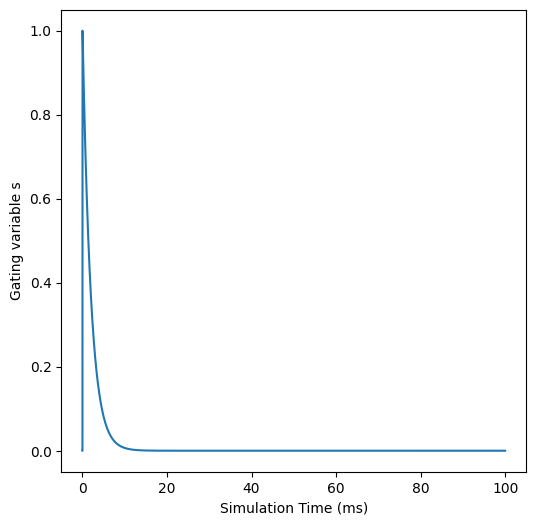

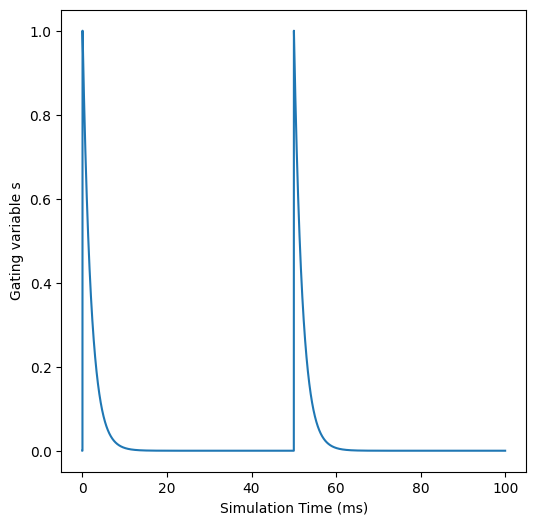

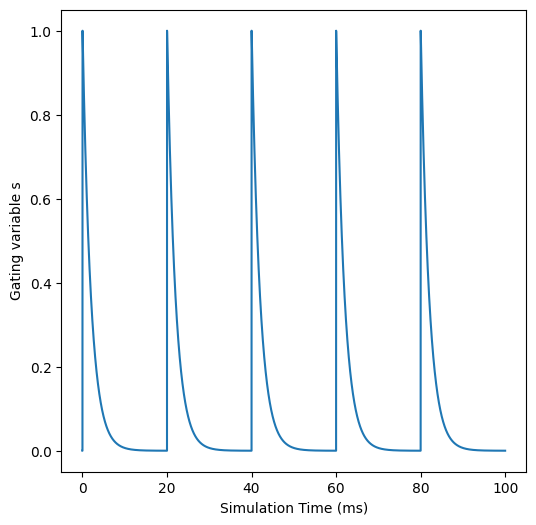

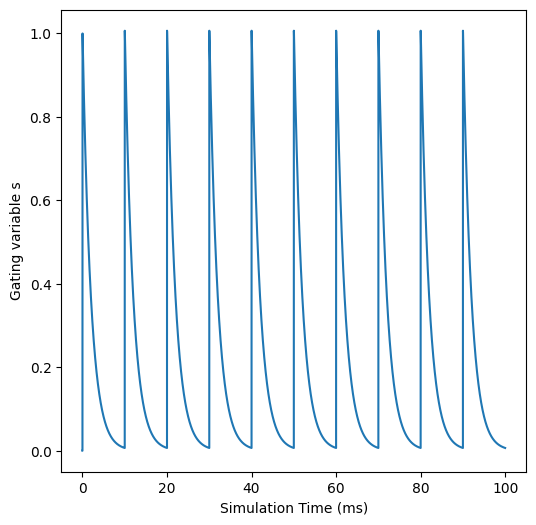

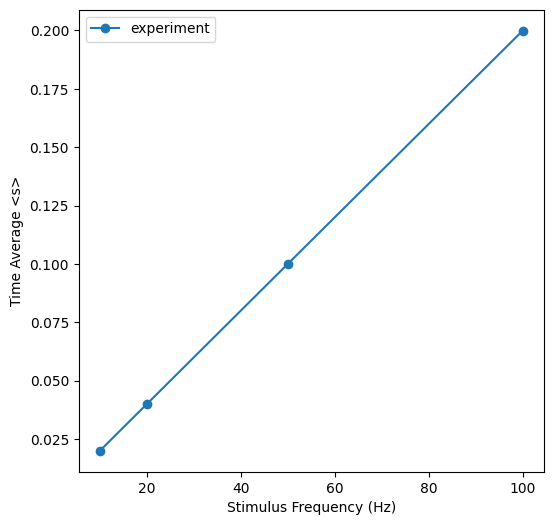

In [2]:
# Part 1

# rlst = [25 * i for i in range(1,4)] # list of stimulus frequency, [hz]
rlst = [10,20,50,100]
alpha_s = 1
tau_ampa = 2 # [ms]
tau_nmda = 50 # [ms]
tau_gaba = 8 # [ms]
Tsim = 100 # total simulation time
dT = 0.01

timestampcoll = np.arange(0,Tsim+dT,dT) # timestamp roll

# average of s registeration
s_avg_lst1 = []

for rr in rlst:
    # for each specific frequency r
    delta_t = 1 * 1000 / rr # interspike interval in [ms]

    # generate spike time set
    t_j = [] 
    for i in range(Tsim):
        if i % delta_t == 0:
            t_j.append(i)

    ss = np.zeros(int((Tsim)/dT+1)) # current record
    ss[0] = 0 # initial condition
    cnt = 1 # 

    # calculate s(t)
    for t in timestampcoll[:-2]:
        # check whether spike at that timepoint
        deltaf = 0
        # at spike
        if t in t_j: 
            deltaf = 1
            ss[cnt+1] = ss[cnt] + alpha_s
        # not at spike
        else:
            ds = alpha_s * deltaf - ss[cnt-1]/tau_ampa
            ss[cnt+1] = ss[cnt] + dT * ds
        cnt += 1
    
    s_avg = np.sum(ss)/Tsim * dT
    print(s_avg)
    s_avg_lst1.append(s_avg)

    plt.figure(figsize=(6,6))
    plt.plot(timestampcoll,ss)
    plt.xlabel('Simulation Time (ms)')
    plt.ylabel('Gating variable s')





plt.figure(figsize=(6,6))
plt.plot(rlst,s_avg_lst1,'-o',label='experiment')
plt.legend()
plt.xlabel('Stimulus Frequency (Hz)')
plt.ylabel('Time Average <s>')

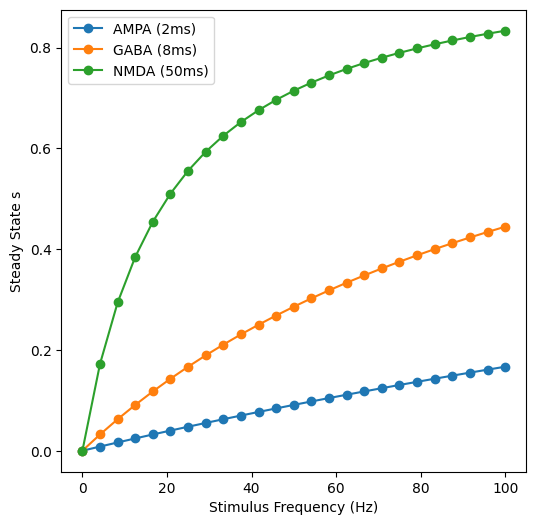

In [3]:
# Part 2, b

# AMPA, GABA, NMDA
from audioop import lin2adpcm

from matplotlib.lines import lineStyles


str_lst = ['AMPA','GABA','NMDA']
tau_s_lst = [2,8,50]
r_lst = np.linspace(0,0.1,25)

plt.figure(figsize=(6,6))
for i in range(len(tau_s_lst)):
    tau_s = tau_s_lst[i]
    tran_name = str_lst[i]
    alpha_s = 1
    s_ss_lst = []
    for rr in r_lst:
        s_ss = (alpha_s*tau_s*rr)/(1+alpha_s*tau_s*rr)
        s_ss_lst.append(s_ss)
    plt.plot(r_lst*1000,s_ss_lst,'-o',label=f"{tran_name} ({tau_s}ms)")

plt.legend()
plt.xlabel('Stimulus Frequency (Hz)')
plt.ylabel('Steady State s')
plt.show()

